In [1]:
# get necessary libraries & import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Penguins_BigQuery.csv')

In [2]:
# observe data
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [3]:
# make a copy to work with
df1 = df.copy()

In [4]:
# check for missing values
df1.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
# drop all rows with any NaN value
df1 = df1.dropna().reset_index(drop=True)

In [6]:
df1.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

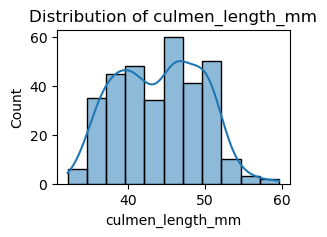

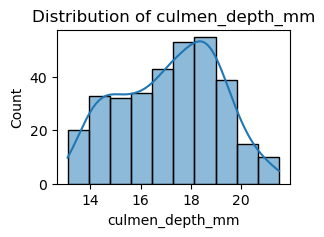

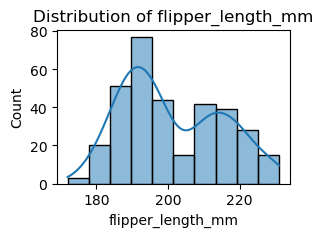

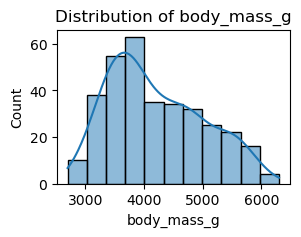

In [7]:
# now we have confirmation of no null values in the dataset
# we can move forward with analysis and visualization
# visualize distributions of numerical features
numerical_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for feature in numerical_features:
    plt.figure(figsize=(3, 2))
    sns.histplot(data=df1, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

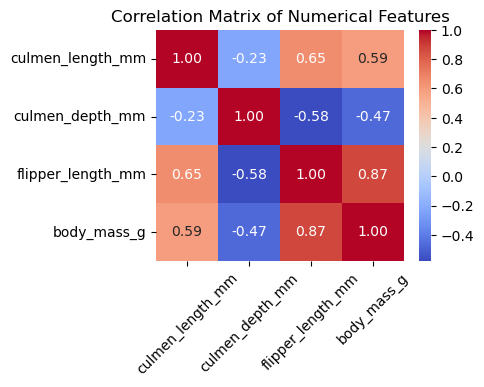

In [8]:
# do a correlation matrix to see relationships between numerical features
correlation_matrix = df1[numerical_features].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.title('Correlation Matrix of Numerical Features')

In [9]:
# seems like flipper length and body mass have a strong positive correlation, which makes sense biologically
# however, culmen length has somewhat a stronger correlation with body mass than culmen depth does
# culmen depth seems to have the weakest correlation with body mass, and the other features
# should we consider the species, island, and genders when analyzing these relationships further?


In [10]:
# lets transform sex into numerical values for easier analysis
df1['sex'] = df1['sex'].map({'MALE': 1, 'FEMALE': 0})
print(df1.head())

                                     species island  culmen_length_mm  \
0        Adelie Penguin (Pygoscelis adeliae)  Dream              36.6   
1        Adelie Penguin (Pygoscelis adeliae)  Dream              39.8   
2        Adelie Penguin (Pygoscelis adeliae)  Dream              40.9   
3  Chinstrap penguin (Pygoscelis antarctica)  Dream              46.5   
4        Adelie Penguin (Pygoscelis adeliae)  Dream              37.3   

   culmen_depth_mm  flipper_length_mm  body_mass_g  sex  
0             18.4              184.0       3475.0  0.0  
1             19.1              184.0       4650.0  1.0  
2             18.9              184.0       3900.0  1.0  
3             17.9              192.0       3500.0  0.0  
4             16.8              192.0       3000.0  0.0  


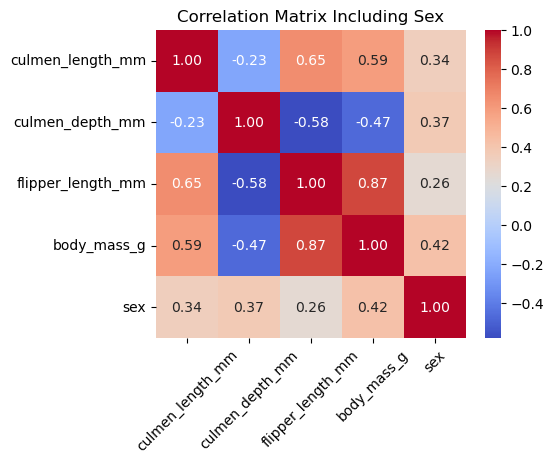

In [11]:
# do another correlation matrix including sex
correlation_matrix = df1[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.title("Correlation Matrix Including Sex")
plt.show()

In [12]:
# it seems that sex has a moderate positive correlation with body mass and flipper length, indicating that male penguins tend to be larger than female penguins.
# seems like culmen length and body mass have a strong positive correlation, which makes sense biologically

Text(0.5, 1.02, 'Pairplot of Numerical Features by Species')

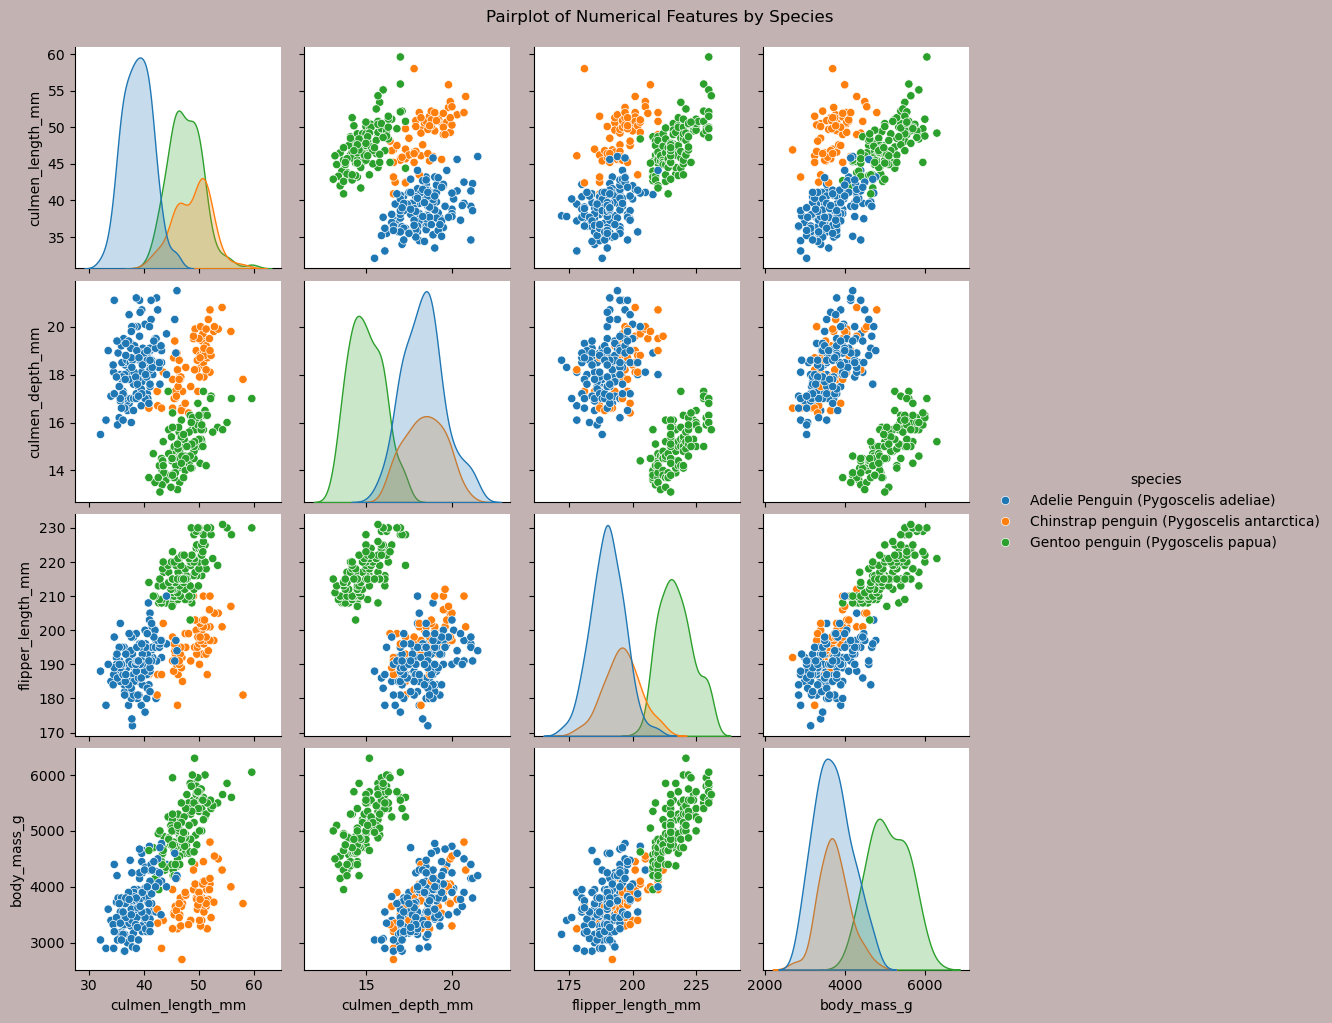

In [13]:
# now we can do some pairplots to visualize relationships between numerical features, colored by species
sns.pairplot(df1, hue='species', vars=numerical_features)
plt.gcf().set_facecolor("#c2b2b2")
plt.suptitle("Pairplot of Numerical Features by Species", y=1.02)
# observe the pairplots to see how species differ in their measurements
# a pairplot compares each numerical feature against every other numerical feature, providing a comprehensive view of their relationships

In [14]:
# lets conduct a hypothesis test to see if there are significant differences in body mass between male and female penguins
from scipy.stats import ttest_ind

male_body_mass = df[df['sex'] == 'MALE']['body_mass_g']
female_body_mass = df[df['sex'] == 'FEMALE']['body_mass_g']

t_stat, p_value = ttest_ind(male_body_mass, female_body_mass)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 8.541720337994516, P-value: 4.897246751596224e-16


In [15]:
# there is a significant difference in body mass between male and female penguins, as indicated by the low p-value

In [16]:
# lets try to look at the mean values of each species
mean_values = df1.groupby('species')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']].mean()
print(mean_values)

                                           culmen_length_mm  culmen_depth_mm  \
species                                                                        
Adelie Penguin (Pygoscelis adeliae)               38.823973        18.347260   
Chinstrap penguin (Pygoscelis antarctica)         48.833824        18.420588   
Gentoo penguin (Pygoscelis papua)                 47.542500        15.002500   

                                           flipper_length_mm  body_mass_g  \
species                                                                     
Adelie Penguin (Pygoscelis adeliae)               190.102740  3706.164384   
Chinstrap penguin (Pygoscelis antarctica)         195.823529  3733.088235   
Gentoo penguin (Pygoscelis papua)                 217.233333  5090.625000   

                                                sex  
species                                              
Adelie Penguin (Pygoscelis adeliae)        0.500000  
Chinstrap penguin (Pygoscelis antarctica)  0.500000

In [17]:
# lets see of the island has any effect on the features 
island_effect = df1.groupby('island')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']].mean()
print(island_effect)


           culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
island                                                                         
Biscoe            45.243902        15.906098         209.603659  4720.121951   
Dream             44.221951        18.339837         193.186992  3718.902439   
Torgersen         39.038298        18.451064         191.531915  3708.510638   

                sex  
island               
Biscoe     0.509202  
Dream      0.504065  
Torgersen  0.489362  


In [18]:
# lets look at island, species, and their physical features
combined_effect = df1.groupby(['island', 'species'])[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']].mean()
print(combined_effect)

                                                     culmen_length_mm  \
island    species                                                       
Biscoe    Adelie Penguin (Pygoscelis adeliae)               38.975000   
          Gentoo penguin (Pygoscelis papua)                 47.542500   
Dream     Adelie Penguin (Pygoscelis adeliae)               38.520000   
          Chinstrap penguin (Pygoscelis antarctica)         48.833824   
Torgersen Adelie Penguin (Pygoscelis adeliae)               39.038298   

                                                     culmen_depth_mm  \
island    species                                                      
Biscoe    Adelie Penguin (Pygoscelis adeliae)              18.370455   
          Gentoo penguin (Pygoscelis papua)                15.002500   
Dream     Adelie Penguin (Pygoscelis adeliae)              18.240000   
          Chinstrap penguin (Pygoscelis antarctica)        18.420588   
Torgersen Adelie Penguin (Pygoscelis adeliae)           

In [19]:
# does the island have anything to do with the physical features of the penguins?
# lets conduct a test to see if there are significant differences in species and body mass across different islands
from scipy.stats import f_oneway

# get body mass data for each island and species
bodies = [group['body_mass_g'].values for name, group in df1.groupby(['island', 'species'])]
f_stat, p_value = f_oneway(*bodies)
print(f"F-statistic: {f_stat}, P-value: {p_value}")
# there are significant differences in body mass across different islands and species, as indicated by the low p-value
# the f-statistic indicates the ratio of variance between groups to variance within groups
# with a f-statistic of 170.85, it suggests that the differences between the groups are much larger than the differences within the groups

F-statistic: 170.78969971582416, P-value: 5.816401954003853e-79


In [20]:
# conduct a post-hoc test to see which specific groups differ
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# prepare data for post-hoc test
df1['group'] = df1['island'] + '_' + df1['species']
tukey_result = pairwise_tukeyhsd(endog=df1['body_mass_g'], groups=df1['group'])
print(tukey_result)
# the post-hoc test shows which specific island-species combinations have significant differences in body mass

                                             Multiple Comparison of Means - Tukey HSD, FWER=0.05                                              
                     group1                                          group2                      meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------------------------------------------------------------------------------
     Biscoe_Adelie Penguin (Pygoscelis adeliae)        Biscoe_Gentoo penguin (Pygoscelis papua)  1380.9659    0.0  1157.7985  1604.1333   True
     Biscoe_Adelie Penguin (Pygoscelis adeliae)       Dream_Adelie Penguin (Pygoscelis adeliae)    -8.2955    1.0  -264.4109     247.82  False
     Biscoe_Adelie Penguin (Pygoscelis adeliae) Dream_Chinstrap penguin (Pygoscelis antarctica)    23.4291  0.999  -221.5641   268.4223  False
     Biscoe_Adelie Penguin (Pygoscelis adeliae)   Torgersen_Adelie Penguin (Pygoscelis adeliae)    -1.1485    1.0  -266.7749    264.478  False

In [21]:
# lets conduct a hypothesis test, creating a null hypothesis, alternate hypothesosis, and p-value interpretation
# Null Hypothesis (H0): There is no significant difference in physical attributes (culmen length, culmen depth, flipper length, body mass) of penguins across different islands.
# Alternative Hypothesis (H1): There is a significant difference in physical attributes of penguins across different islands.
# Significance Level (α): 0.05
# We need to test this hypothesis using ANOVA for each physical attribute across different islands.
from scipy.stats import f_oneway
numerical_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for feature in numerical_features:
    groups = [group[feature].values for name, group in df1.groupby('island')]
    f_stat, p_value = f_oneway(*groups)
    print(f"Feature: {feature}, F-statistic: {f_stat}, P-value: {p_value}")
    if p_value < 0.05:
        print(f"Reject the null hypothesis for {feature}: Significant differences exist across islands.")
    else:
        print(f"Fail to reject the null hypothesis for {feature}: No significant differences across islands.")


Feature: culmen_length_mm, F-statistic: 27.547543811091575, P-value: 8.582825582940171e-12
Reject the null hypothesis for culmen_length_mm: Significant differences exist across islands.
Feature: culmen_depth_mm, F-statistic: 107.36154786510022, P-value: 1.1550789708277412e-36
Reject the null hypothesis for culmen_depth_mm: Significant differences exist across islands.
Feature: flipper_length_mm, F-statistic: 94.89780085443215, P-value: 2.649070561681035e-33
Reject the null hypothesis for flipper_length_mm: Significant differences exist across islands.
Feature: body_mass_g, F-statistic: 105.88698746847756, P-value: 2.8319517565549136e-36
Reject the null hypothesis for body_mass_g: Significant differences exist across islands.


In [22]:
# the conclusion from the hypothesis tests indicates that there are significant differences in all physical attributes
# of penguins across different islands, as all p-values are below the significance level of 0.05.

In [23]:
# next we will create a model that can predict the species of penguin based on their physical attributes
# import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [24]:

# prepare the data for modeling
X = df1[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = df1['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:

# create and train the model
model = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42) # didn't know about the '42' reference, very funny
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [26]:

# make predictions
y_pred = model.predict(X_test)

In [27]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[26  2  0]
 [ 0 18  0]
 [ 0  0 21]]
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      0.93      0.96        28
Chinstrap penguin (Pygoscelis antarctica)       0.90      1.00      0.95        18
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        21

                                 accuracy                           0.97        67
                                macro avg       0.97      0.98      0.97        67
                             weighted avg       0.97      0.97      0.97        67



In [28]:
# the model was slightly tuned by increasing the number of estimators to 300 and adding class_weight='balanced' to handle any class imbalance
# the model performs quite well, with high precision, recall, and f1-scores for each species
# the overall f1-score is at 99%, which is absoultely fantastic!

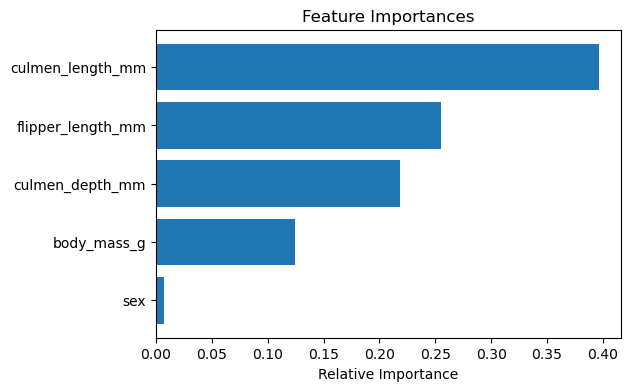

In [29]:

# next plan is to visualize feature importance from the model to see which physical attributes are most influential in predicting species
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)
# plot feature importance
plt.figure(figsize=(6, 4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Relative Importance')
plt.show()

In [30]:
# export model for future use
import joblib
joblib.dump(model, 'penguin_species_model.pkl')

['penguin_species_model.pkl']

In [31]:
# next step is to get more data to ensure that the model performs well on unseen data, despite us already testing with a 80/20 train-test split